In [1]:
import torch
import numpy
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

from model.net import *
from utils.training import *
from data.data import *

## Experiment Config

In [2]:
model_path = os.path.join(os.getcwd(), "weights")

args = {
    'USE_CUDA': True if torch.cuda.is_available() else False,
    'BATCH_SIZE': 256,
    'N_EPOCHS': 30,
    'LEARNING_RATE_1': 1e-2,
    'LEARNING_RATE_2': 1e-2,
    'MOMENTUM': 0.9,
    'DATASET_NAME':'mnist',
    'LAMBDA_recon': 1,
    'LAMBDA_class': 1,
    'LReLU_negative_slope':0.1,
    'WEIGHTDECAY':5e-6,
}

## Model Loading

In [3]:
# Config for 16 1d vectors in Capsule Layer. Set the Softmax Dimension to 1 in this case
class Config:
    def __init__(self, dataset='mnist'):
        # CNN (cnn)
        self.cnn_in_channels = 1
        self.cnn_out_channels = 12
        self.cnn_kernel_size = 15

        # Primary Capsule (pc)
        self.pc_num_capsules = 1
        self.pc_in_channels = 12
        self.pc_out_channels = 16
        self.pc_kernel_size = 8
        self.pc_num_routes = 1 * 7 * 7

        # Digit Capsule 1 (dc)
        self.dc_num_capsules = 49
        self.dc_num_routes = 7 * 7 #7*7*16
        self.dc_in_channels = 16
        self.dc_out_channels = 16 #1
        
        # Digit Capsule 2 (dc)
        self.dc_2_num_capsules = 10
        self.dc_2_num_routes = 7 * 7
        self.dc_2_in_channels = 16 #1
        self.dc_2_out_channels = 16

        # Decoder
        self.input_width = 28
        self.input_height = 28

torch.manual_seed(2)
config = Config()
net = CapsNet(args, config)
# net = torch.nn.DataParallel(net)
net.load_state_dict(torch.load(os.path.join(model_path, 'CapsNetMNIST_Recon_model2_iter2.pth'), map_location='cpu'))
    
if args['USE_CUDA']:
    net = net.cuda()
    

## Loading Dataset

In [4]:
dataloader = {}
dataloader['train'], dataloader['val'] = dataset(args)

## Training CapsuleNet

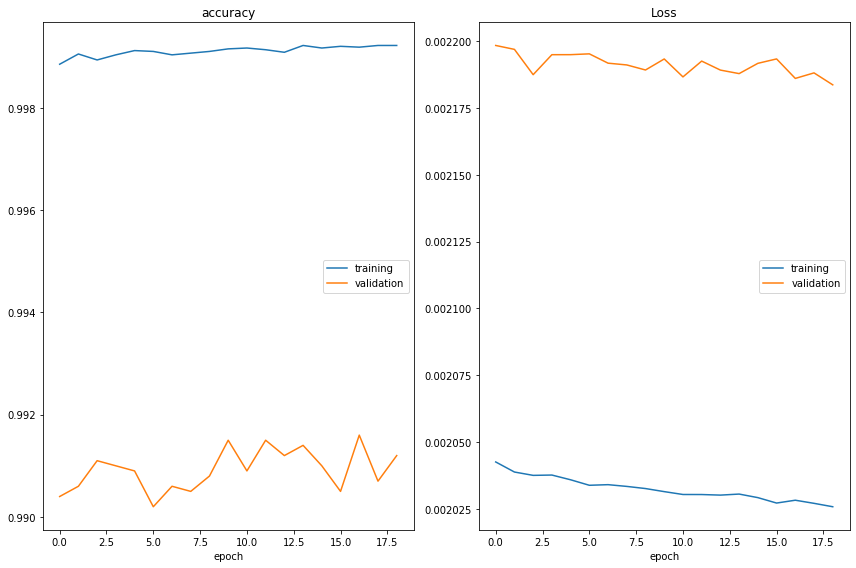

accuracy
	training         	 (min:    0.999, max:    0.999, cur:    0.999)
	validation       	 (min:    0.990, max:    0.992, cur:    0.991)
Loss
	training         	 (min:    0.002, max:    0.002, cur:    0.002)
	validation       	 (min:    0.002, max:    0.002, cur:    0.002)


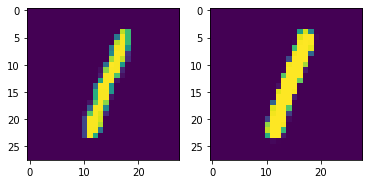

  0%|          | 0/235 [00:00<?, ?it/s]

Weights of Reconstruction Layer: tensor([-1.0414e-06,  9.8887e-07, -2.0667e-06], device='cuda:0',
       grad_fn=<AsStridedBackward>)
Grads of Reconstruction Layer: tensor([-2.9647e-11,  2.0093e-11, -3.7407e-11], device='cuda:0')


 93%|█████████▎| 218/235 [02:03<00:09,  1.76it/s]

KeyboardInterrupt: 

In [6]:
optimizer = torch.optim.Adam([
                {'params':net.decoder.parameters(), 'lr':args['LEARNING_RATE_2'], 'weight_decay':args['WEIGHTDECAY']},
                {'params': net.conv_layer.parameters()},
                {'params': net.primary_capsules.parameters()},
                {'params': net.digit_capsules_1.parameters()},
                {'params': net.digit_capsules_2.parameters()},
            ], lr=args['LEARNING_RATE_1'])

train_clean(net, optimizer, dataloader, args)

In [7]:
torch.save(net.state_dict(), os.path.join(model_path, "./CapsNetMNIST_Recon_model2_iter2.pth"))